# SC1015 Lab Exercise 3

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Problem 1 : Analysis of Numeric Variables

### In this problem, your job is to analyze the following numeric variables in the dataset and their relationship with SalePrice.
['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']


### a) Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have?

In [3]:
traindata = pd.read_csv('train.csv')
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
traindata.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#f = plt.figure(figsize=(24, 4))

Q1 = traindata.quantile(0.25)
Q3 = traindata.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id                 729.50
MSSubClass          50.00
LotFrontage         21.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         166.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         41.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float

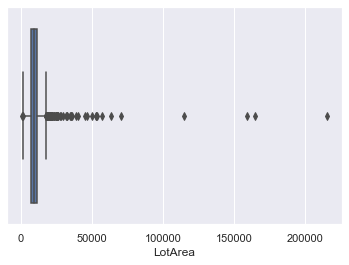

In [21]:
sb.boxplot(x=traindata['LotArea'])
plt.show()

### b) Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative?

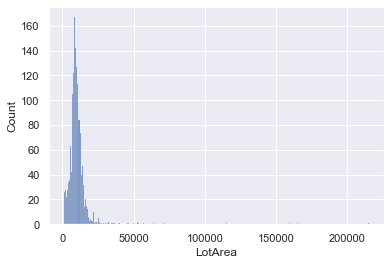

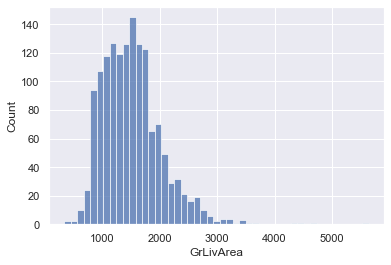

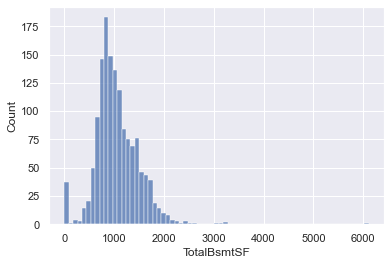

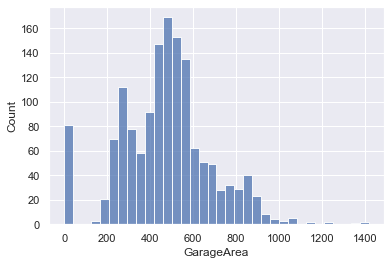

In [7]:
sb.histplot(x=traindata['LotArea'])
plt.show()
sb.histplot(x=traindata['GrLivArea'])
plt.show()
sb.histplot(x=traindata['TotalBsmtSF'])
plt.show()
sb.histplot(x=traindata['GarageArea'])
plt.show()

GarageArea is the most skewed from a regular normal distribution and the skew is negative.

### c) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

In [8]:
prob1Df = traindata[['LotArea','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']].copy()
correlationList = traindata[prob1Df.columns[1:]].corr()['SalePrice'][:-1]
correlationList.sort_values(kind="quicksort")

TotalBsmtSF    0.613581
GarageArea     0.623431
GrLivArea      0.708624
Name: SalePrice, dtype: float64

## Problem 2 : Analysis of Categorical Variables


### In this problem, your job is to analyze the following categorical variables in the data and their relationship with SalePrice.
['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']


### a) Which of these variables has the highest number of levels? Which of the levels has the highest number of houses?

In [9]:
traindata['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [10]:
traindata['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [11]:
traindata['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [12]:
traindata['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

'Neighborhood' has the highest number of levels.
From 'BldgType', we can see that 1Fam has the highest number of houses at 1220.

### b) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

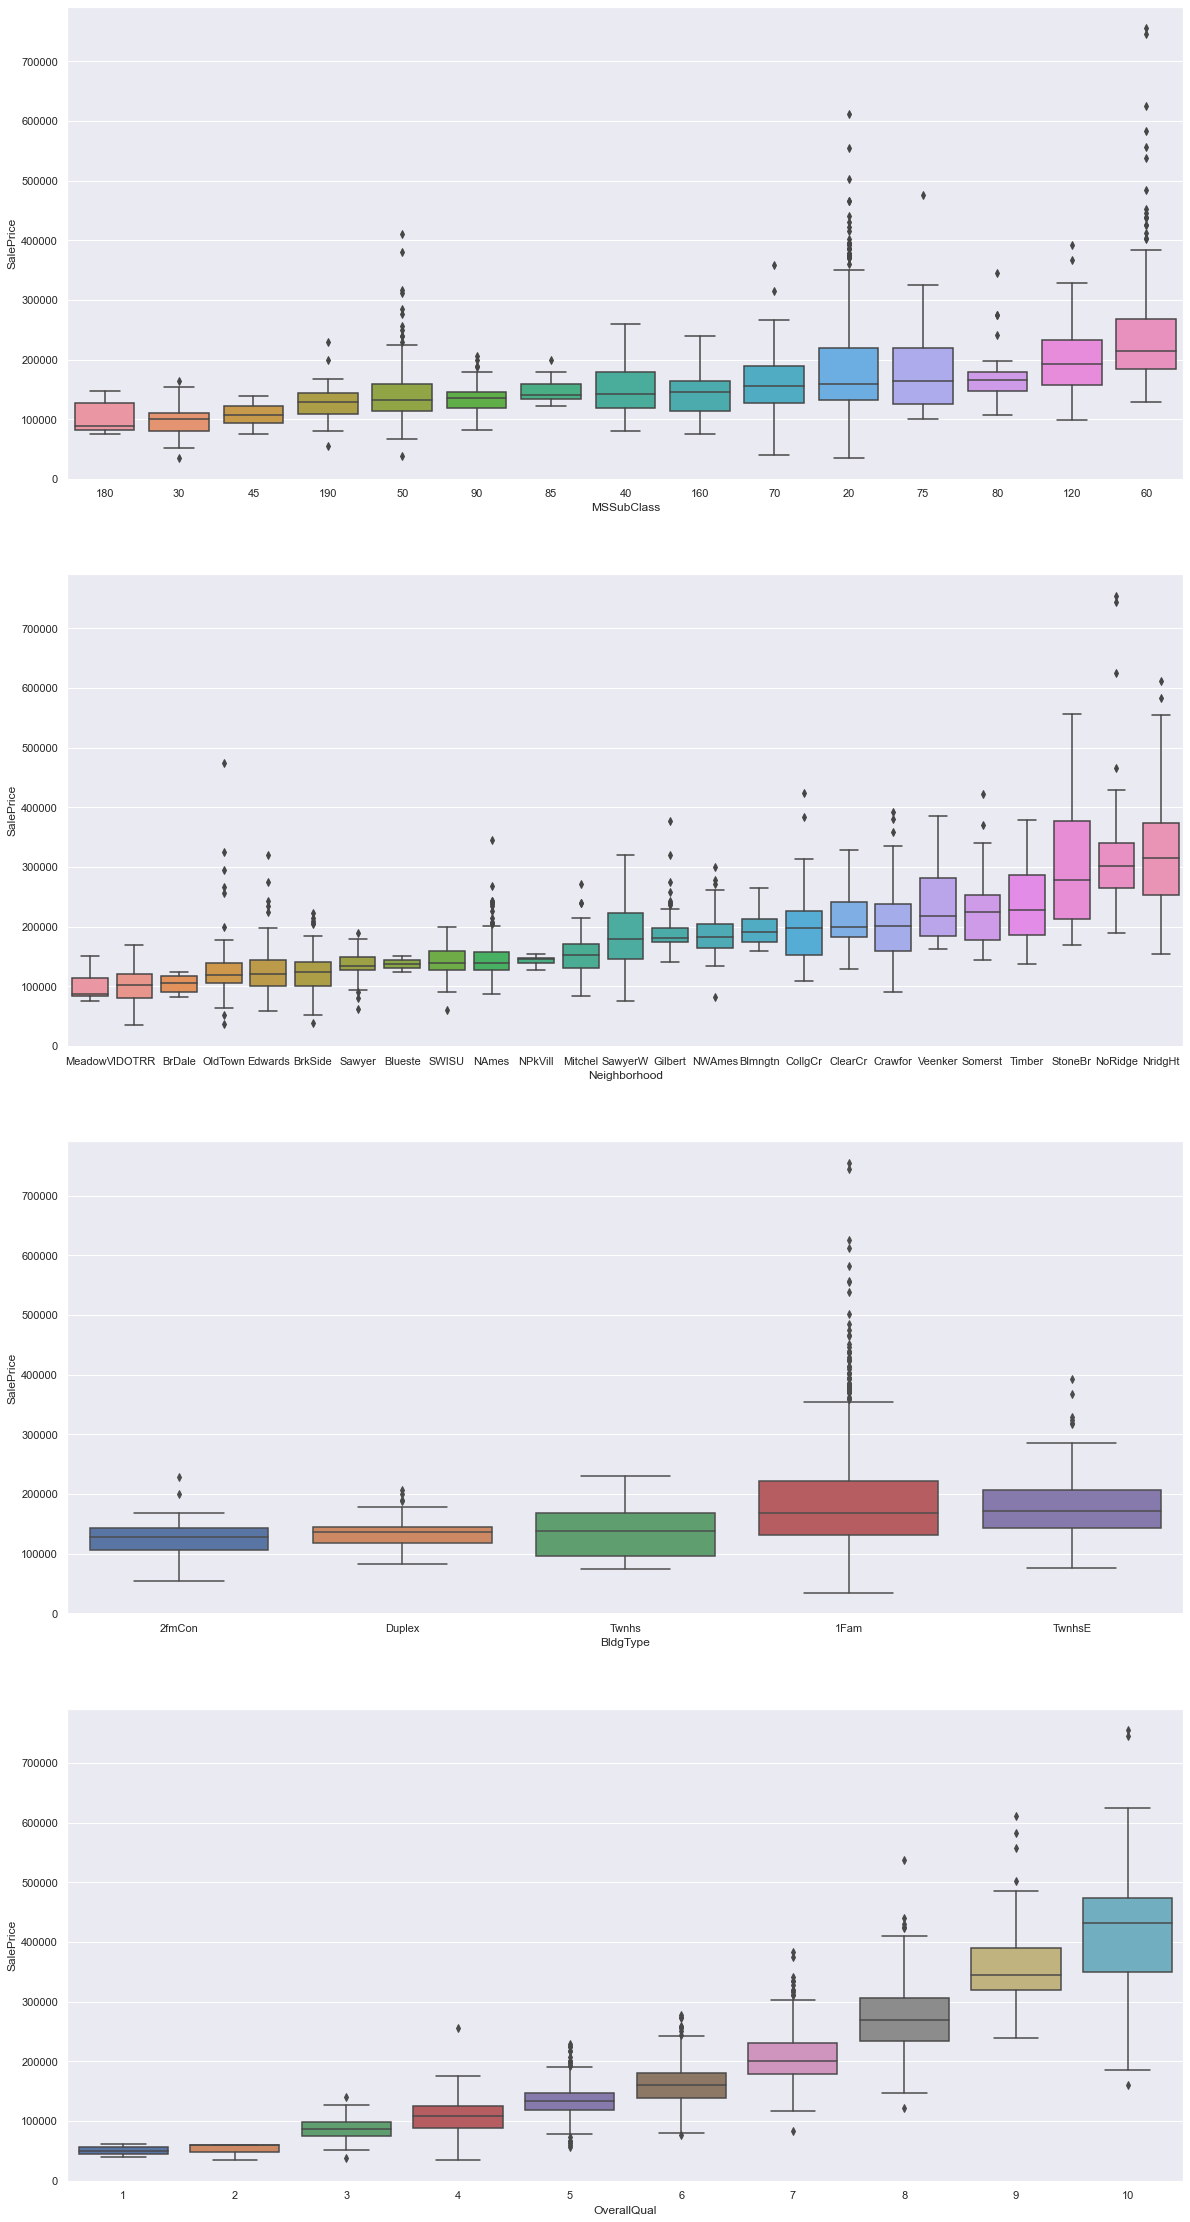

In [13]:
prob2Df = traindata[['MSSubClass','Neighborhood','BldgType','OverallQual','SalePrice']].copy()

fig, ax = plt.subplots(4,1, figsize=(20,40))
for var, subplot in zip(prob2Df, ax.flatten()):
    sorted_nb = traindata.groupby([var])['SalePrice'].median().sort_values()
    sb.boxplot(x=var, y='SalePrice', data=traindata, ax=subplot, order=list(sorted_nb.index))

## Problem 3 : Interesting Questions for EDA

### a) Does the SalePrice of a house get affected by whether it has a Garage or not? Justify your answer using EDA

In [14]:
#Extract two variables from the DataFrame -- SalePrice and GarageType -- and check their mutual relationship.
saleprice = pd.DataFrame(traindata['SalePrice'])
garagetype = pd.DataFrame(traindata['GarageType'])

ValueError: min() arg is an empty sequence

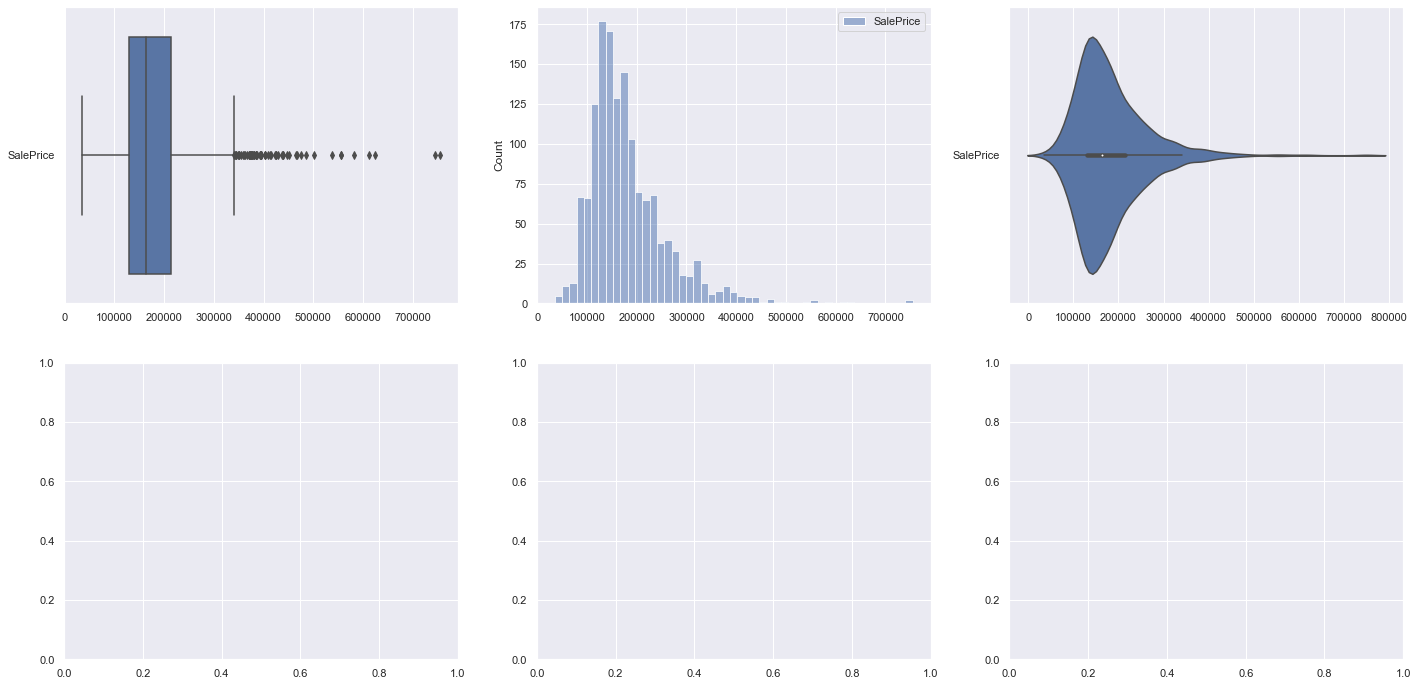

In [15]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for SalePrice
sb.boxplot(data = saleprice, orient = "h", ax = axes[0,0])
sb.histplot(data = saleprice, ax = axes[0,1])
sb.violinplot(data = saleprice, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for GarageType
sb.boxplot(data = garagetype, orient = "h", ax = axes[1,0])
sb.histplot(data = garagetype, ax = axes[1,1])
sb.violinplot(data = garagetype, orient = "h", ax = axes[1,2])

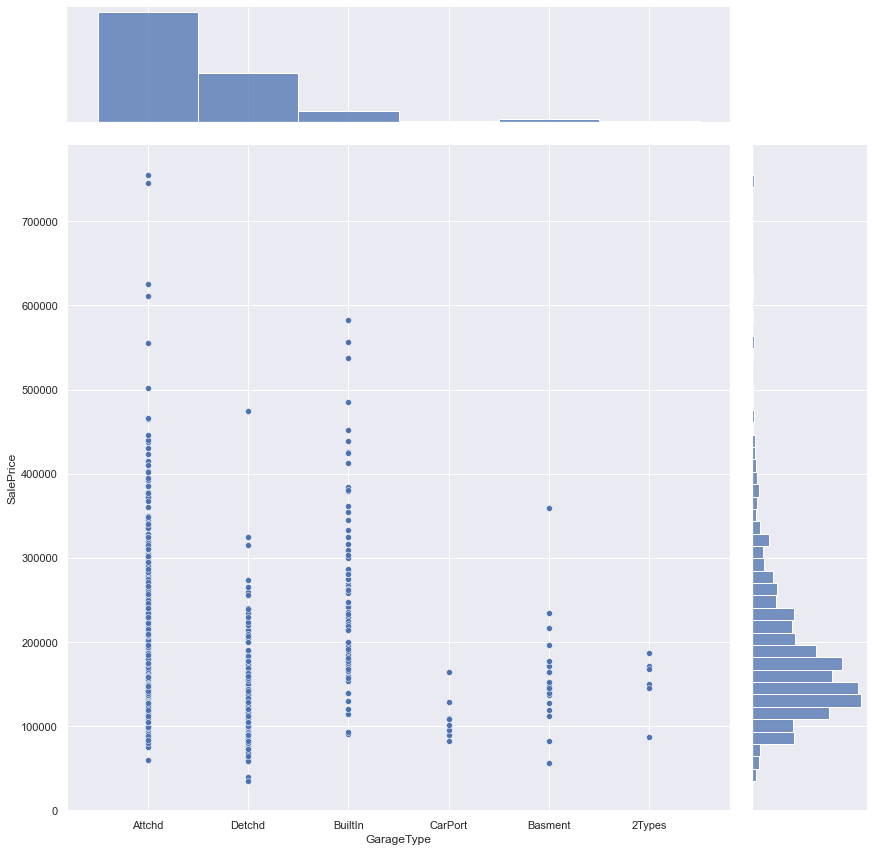

In [19]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([garagetype, saleprice], axis = 1).reindex(saleprice.index)

# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "GarageType", y = "SalePrice", height = 12)

In [20]:
jointDF.corr()

,SalePrice
SalePrice,1.0


In [ ]:
From the correlation of _______, we can tell that the SalePrice of a house get affected by whether it has a Garage. 

### b) Does the SalePrice of a house get affected by how recently it got Remodeled? Justify your answer using EDA.